In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473151,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.988754,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.054337,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.424400,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.397667,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.815498,144114400


In [4]:
df = df.reset_index()

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473151,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [6]:
df = df.drop(['Date', 'Adj Close'], axis=1)

In [7]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


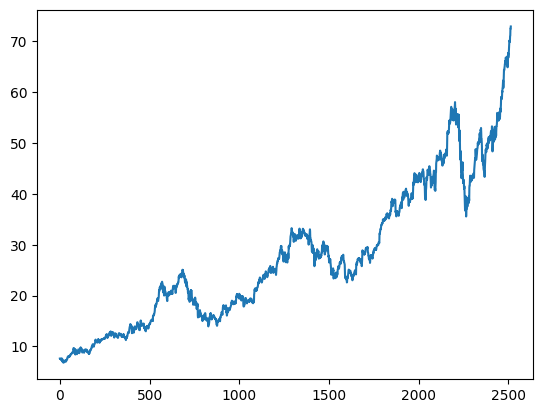

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

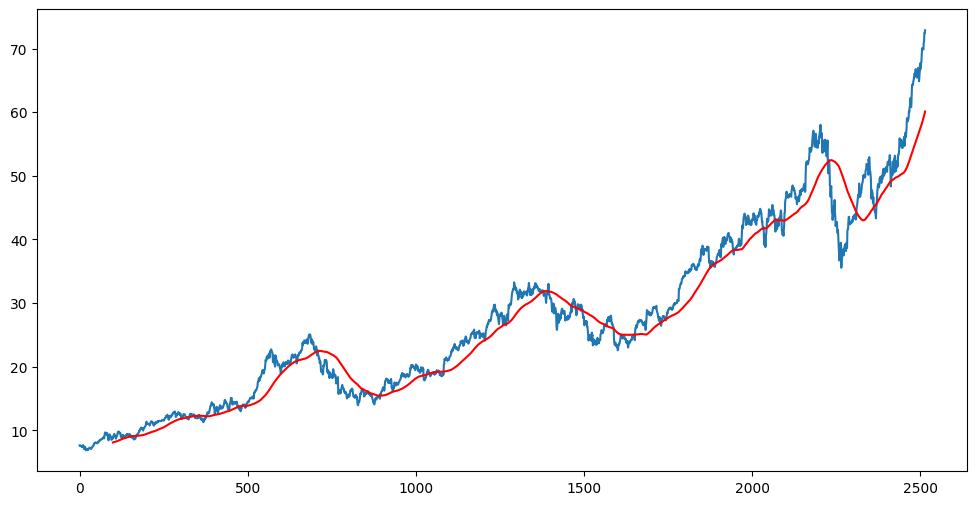

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

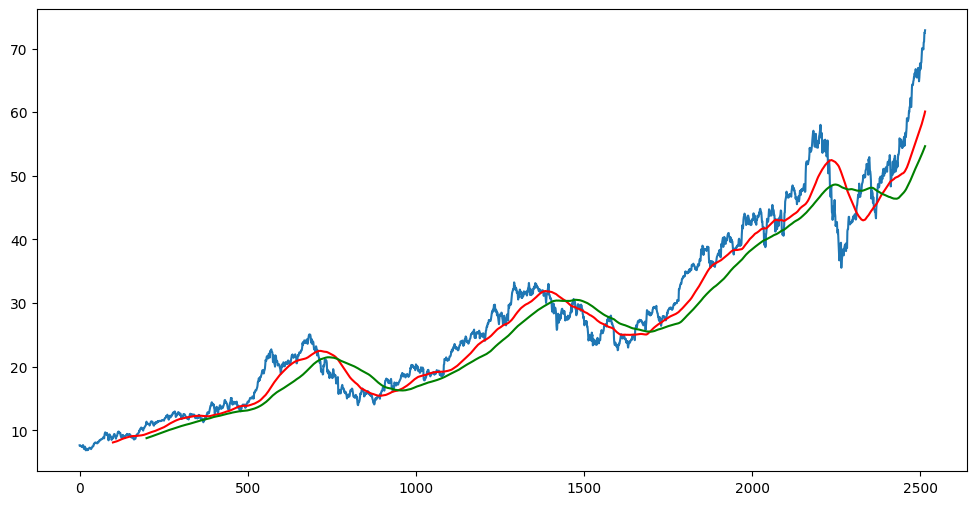

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(2515, 5)

In [15]:
#Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [16]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [17]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [20]:
data_training_array.shape

(1760, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(1660, 100, 1)

In [23]:
# ML Model

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))




model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.5))



model.add(Dense(units=1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 21s 213ms/step - loss: 0.0764
Epoch 2/50
52/52 [==============================] - 11s 204ms/step - loss: 0.0191
Epoch 3/50
52/52 [==============================] - 11s 221ms/step - loss: 0.0197
Epoch 4/50
52/52 [==============================] - 12s 221ms/step - loss: 0.0154
Epoch 5/50
52/52 [==============================] - 11s 221ms/step - loss: 0.0136
Epoch 6/50
52/52 [==============================] - 11s 208ms/step - loss: 0.0135
Epoch 7/50
52/52 [==============================] - 11s 206ms/step - loss: 0.0132
Epoch 8/50
52/52 [==============================] - 13s 243ms/step - loss: 0.0124
Epoch 9/50
52/52 [==============================] - 11s 221ms/step - loss: 0.0116
Epoch 10/50
52/52 [==============================] - 12s 239ms/step - loss: 0.0106
Epoch 11/50
52/52 [==============================] - 11s 222ms/step - loss: 0.0109
Epoch 12/50
52/52 [==============================] - 10s 191ms/step - loss: 0.0100
Epoch 13/50
5

In [28]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model.save('my_model.keras')

In [30]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [33]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [35]:
input_data.shape

(855, 1)

In [36]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [38]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 55ms/step


In [39]:
y_predicted.shape

(755, 1)

In [40]:
y_predicted

array([[0.13418275],
       [0.13431856],
       [0.13445067],
       [0.1345683 ],
       [0.13467023],
       [0.1347489 ],
       [0.13479847],
       [0.13482511],
       [0.13484672],
       [0.13487265],
       [0.13492075],
       [0.13499522],
       [0.13508844],
       [0.13520509],
       [0.1353457 ],
       [0.13550496],
       [0.13567922],
       [0.13586503],
       [0.1360487 ],
       [0.13624328],
       [0.13645566],
       [0.13669065],
       [0.13694581],
       [0.13718894],
       [0.13750038],
       [0.1379255 ],
       [0.1385014 ],
       [0.1392608 ],
       [0.14023286],
       [0.14143205],
       [0.14285731],
       [0.1444883 ],
       [0.1463143 ],
       [0.14833558],
       [0.15054235],
       [0.15291074],
       [0.15541786],
       [0.15804657],
       [0.16077042],
       [0.16355151],
       [0.16635248],
       [0.16911212],
       [0.17175314],
       [0.17433   ],
       [0.17687649],
       [0.17941079],
       [0.18193454],
       [0.184

In [41]:
scaler.scale_

array([0.02123255])

In [42]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

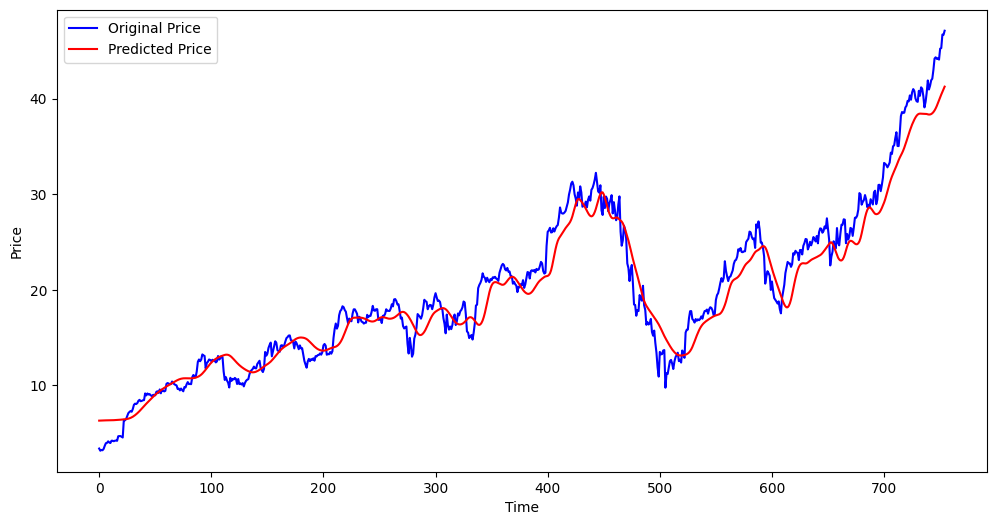

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()